<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Circuitos%20El%C3%A9tricos%20I%20-%20Semana%208.1%20-%20Circuitos%20RL%20e%20RC%20de%20primeira%20ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install -e .
    
from IPython.core.display import HTML
from IPython.display import Image
import ipywidgets as widgets
import IPython.display as display

import sympy as sp
import numpy as np
from circuit.utils import symplot, symdisp, round_expr,set_preferences

try:
    import scienceplots
except:
    ! pip install SciencePlots
    
import matplotlib.pyplot as plt
plt.style.use(['science'])
set_preferences()

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 8*

### Circuitos RL e RC de primeira ordem

Os quatro tipos possíveis de circuitos de primeira ordem estão ilustrados na figura abaixo.

<img src="./figures/J11C1.png?raw=1" width="700">

Lembrando que um circuito de primeira ordem qualquer, com vários resistores e fontes, por exemplo, pode ser reduzido a um dos quatro circuitos acima fazendo $R=R_{th}$, $v_s=v_{th}$ e $i_s=i_{N}$. Logo, desde que o circuito contenha apenas um elemento indutor ou capacitor, a análise de um circuito de primeira ordem deve ser feita primeiramente determinando-se o circuito equivalente de Thévenin ou de Norton conectado aos terminais do elemento em questão.

### EDO linear homogênea

Aplicando as leis de Kirchhoff juntamente com a **convenção passiva** , obtém-se as seguintes EDOs para a corrente passando pelo indutor no circuito RL e para a tensão nos terminais do capacitor no circuito RC, respectivamente:

$$ \begin{equation}\label{edoRL}  \frac{di_L(t)}{dt} + \frac{R}{L}i_L(t) = \frac{v_s}{L}, \end{equation}$$ 


$$ \begin{equation}\label{edoRC} \frac{dv_C(t)}{dt} + \frac{1}{RC}v_C(t) = \frac{v_s}{RC}. \end{equation}$$ 

Para encontrar soluções para as EDOs não-homogêneas ($\ref{edoRL}$) e ($\ref{edoRC}$) é necessário resolver primeiro uma EDO homogênea separável do tipo

$$ \begin{equation}\label{edoGenHomo}\large  \frac{dx(t)}{dt} + \frac{1}{\tau}x(t) = 0, \end{equation}$$ 

com $\tau$ sendo a constante de tempo do circuito. Podemos resolver (\ref{edoGenHomo}) via integração fazendo

$$ \begin{equation}\large  \int_{x\left(t_{0}^+\right)}^{x(t)} \frac{d u}{u}=-\frac{1}{\tau} \int_{t_{0}^+}^{t} d v \end{equation}$$.

Logo, a solução da EDO homogênea será dada por  $$ \begin{equation}\large x(t) = x(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}}. \end{equation} $$

### Resposta natural ($v_s = 0$)

A resposta natural de circuitos RL/RC corresponderá a solução da EDO homogênea, ou seja,

$$ \begin{equation} \large i_L(t) = i_L(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}}, \end{equation}$$

com $\tau = L/R$ para o circuito RL e

$$\begin{equation}  \large v_C(t) = v_C(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}}, \end{equation} $$

com $\tau = RC$ para o circuito RC.

### Resposta ao degrau ($v_s \neq 0$)

A resposta ao degrau de circuitos RL/RC corresponderá a solução completa das equações (\ref{edoRL}) e (\ref{edoRC}), obtidas combinando a solução da EDO homogênea com a solução particular (ou solução de regime estacionário) de cada circuito. Logo,

$$
\begin{equation}
\large i_L(t) = i_L(\infty) + A i_L(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}}, \label{RL1}
\end{equation}
$$

com $\tau = L/R$ para o circuito RL e

$$
\begin{equation} 
\large v_C(t) = v_C(\infty) + Av_C(t_0^+)e^{-\frac{(t-t_0^+)}{\tau}},\label{RC1} 
\end{equation}
$$

com $\tau = RC$ para o circuito RC, sendo $A$ a constante da solução geral da EDO.

O valor da constante $A$ pode ser determinado considerando o problema de valor inicial, ou seja, utilizando as condições iniciais de corrente no indutor ou tensão no capacitor (condições de contorno). Desse modo, para o circuito RL como sabemos que $t\to t_0^+\;s \Rightarrow i_L(t)\to i_L(t_0^+)$, temos que

$$\large{\begin{align} i_L(t_0^+) &= i_L(\infty) + A i_L(t_0^+) e^{-\frac{(t_0^+-t_0^+)}{\tau}}\nonumber\\ &= i_L(\infty) + A i_L(t_0^+) \nonumber\\ \Rightarrow A &= \frac{i_L(t_0^+)- i_L(\infty)}{i_L(t_0^+)}\nonumber
\end{align} }$$

e para o circuito RC sabemos que $t\to t_0^+\;s \Rightarrow v_C(t)\to v_C(t_0^+)$, logo

$$\large{\begin{align} v_C(t_0^+) &= v_C(\infty) + A v_C(t_0^+)e^{-\frac{(t_0^+-t_0^+)}{\tau}}\nonumber\\ &= v_C(\infty) + A v_C(t_0^+) \nonumber\\ \Rightarrow A &= \frac{v_C(t_0^+)- v_C(\infty)}{v_C(t_0^+)}\nonumber
\end{align} }$$

Substituindo os valores encontrados de $A$ nas equações ($\ref{RL1}$) e ($\ref{RC1}$) obtemos as expressões ($\ref{solucRL}$) e ($\ref{solucRC}$), ou seja, a solução geral dos circuitos de primeira ordem.

### Resposta geral ($v_s = 0$ ou $v_s \neq 0$)

De acordo com o exposto acima, a resposta geral de circuitos RL/RC pode ser resumida nas expressões

$$ \begin{equation}\label{solucRL} \large  i_L(t) = i_L(\infty) + \left[i_L(t_0^+)- i_L(\infty)\right]e^{-\frac{(t-t_0^+)}{\tau}},\end{equation} $$

com $\tau = L/R$ para o circuito RL e

$$ \begin{equation} \label{solucRC} \large v_C(t) = v_C(\infty) + \left[v_C(t_0^+)- v_C(\infty)\right]e^{-\frac{(t-t_0^+)}{\tau}},\end{equation} $$

com $\tau = RC$ para o circuito RC.

Finalmente, para qualquer circuito de primeira ordem,

$$\begin{equation}  \large x(t) = x(\infty) + \left[x(t_0^+)-x(\infty)\right]e^{-\frac{(t-t_0^+)}{\tau}},\end{equation} $$

com $\tau$ sendo a constante de tempo associada a este circuito.

### Problema 1

Para circuito da figura abaixo, a chave encontra-se conectada ao terminal $a$ há muito tempo. Em $t=0s$, posição da chave muda do ponto $a$ para o ponto $b$. Em $t=20 ms$, a chave é desconectada do ponto $b$, permanecendo aberta. Determine:

a. A corrente no indutor para $0^+s\leq t \leq 20^-ms$.\
b. A tensão nos terminais indutor em $t=0^-s$ e $t=0^+s$.\
c. A tensão nos terminais do resistor de 40 $\Omega$ em $t=0^-s$ e $t=0^+s$.\
d. A corrente no indutor para $t\geq20^+ms$.\
e. A tensão nos terminais do indutor em $t=20^+ms$.


<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J11C2.png?raw=1" width="600">

Simulação do circuito disponível no link: https://tinyurl.com/yfs69qqu

#### Visualização das curvas $i_L(t)$, $v_L(t)$ e $p_L(t)$

<IPython.core.display.Math object>

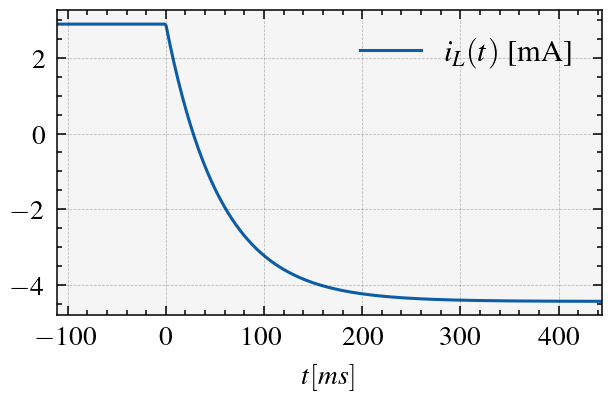

In [7]:
# parâmetros do circuito
L   = 1
vth = -80e-3
Rth = 18

# informações obtidas pela análise do circuito
iL_inf = vth/Rth # iL(infinito)
iL_t0  = 2.9e-3  # iL(t0+)

τ = L/Rth  # constante de tempo do circuito RL
t0  = 0    # instante inicial

t = sp.symbols('t', real=True) # define a variável tempo

iL = sp.Piecewise( (iL_t0, t<0),                                              # iL(t) para t<t0-
                   (iL_inf + (iL_t0 - iL_inf)*sp.exp(-(t-t0)/τ), t>=0) )*1000 # iL(t) para t>t0+

symdisp('i_L(t) =', round_expr(iL.simplify(), 3), 'mA')

intervalo  = np.linspace(t0-2*τ, t0+8*τ, 400)
symplot(t, iL, intervalo, funLabel = '$i_L(t)$ [mA]', xlabel='t [ms]', xfactor=1e-3)

<IPython.core.display.Math object>

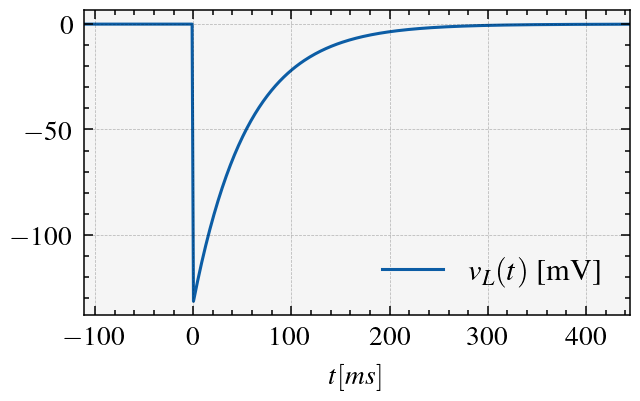

In [8]:
vL = L*sp.diff(iL,t)
vL = vL.simplify()

symdisp('v_L(t) = ', vL, ' mV')

symplot(t, vL, intervalo, funLabel = '$v_L(t)$ [mV]', xlabel='t [ms]', xfactor=1e-3)

<IPython.core.display.Math object>

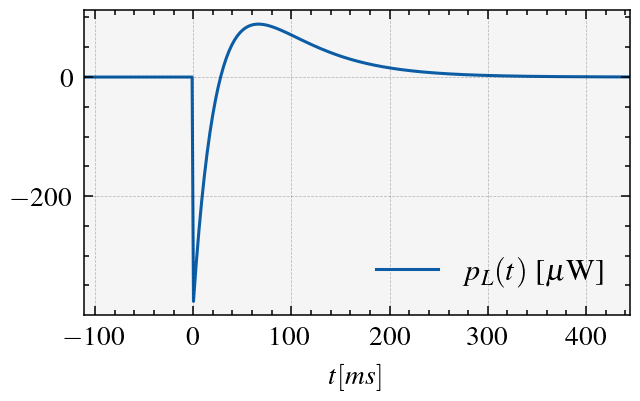

In [9]:
pL = vL*iL
pL = pL.simplify()

symdisp('p_L(t) = ', round_expr(pL,3), ' μW')

symplot(t, pL, intervalo, funLabel = '$p_L(t)$ [$\\mu$W]', xlabel='t [ms]', xfactor=1e-3)

In [10]:
img1 = open('./figures/J11C2a.gif', 'rb').read()
img2 = open('./figures/J11C2b.gif', 'rb').read()

wi1 = widgets.Image(value=img1, format='gif', width=600, height=400)
wi2 = widgets.Image(value=img2, format='gif', width=600, height=400)

sidebyside = widgets.HBox([wi1, wi2])
display.display(sidebyside)

### Problema 2

No circuito da figura abaixo, antes de conectado ao circuito, o capacitor possui uma tensão inicial de $v_C=10~V$. Em $t=0s$, o capacitor é conectado ao circuito. Determine:

a. O circuito equivalente de Thévenin do ponto de vista dos terminais do capacitor.\
b. A tensão no capacitor $v_C(t)$ para $t\geq 0^+s$.\
c. A tensão $v_x(t)$ para $t\geq 0^+s$. 

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J11C3.png?raw=1" width="600">

Simulação do circuito disponível no link: https://tinyurl.com/yzhty8w3